<a href="https://colab.research.google.com/github/Hironobu-Kawaguchi/Hello-World/blob/master/tf2keras_mnist_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow 2.0 の keras で MNIST

## import
Google Colaboratory ではまだデフォルトのTensorFlowは1.xなので、2.0に変更してインポート（近々デフォルトがアップデートされる予定のようです。）

In [1]:
# TensorFlow 2.0 install
try:
    %tensorflow_version 2.x
except Exception:
    pass

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf

In [3]:
tf.__version__

'2.1.0'

## Data
Google Colaboratory の sample_data に用意されている MNIST(small)を使用します

In [0]:
import numpy as np
import pandas as pd

In [5]:
mnist_train_small = pd.read_csv('sample_data/mnist_train_small.csv', header=None)
mnist_train_small.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
mnist_test = pd.read_csv('sample_data/mnist_test.csv', header=None)
mnist_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
mnist_train_small.shape, mnist_test.shape

((20000, 785), (10000, 785))

In [8]:
y_train = mnist_train_small.iloc[:, 0].to_numpy()
y_train.shape

(20000,)

In [9]:
x_train = mnist_train_small.drop(columns=0).to_numpy().reshape(-1,28,28)
x_train.shape

(20000, 28, 28)

In [10]:
y_test = mnist_test.iloc[:, 0].to_numpy()
y_test.shape

(10000,)

In [11]:
x_test = mnist_test.drop(columns=0).to_numpy().reshape(-1,28,28)
x_test.shape

(10000, 28, 28)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

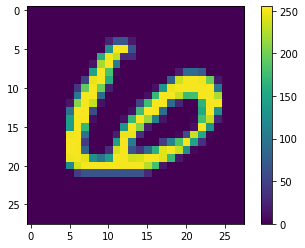

In [13]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [0]:
x_train, x_test = x_train / 255.0, x_test / 255.0

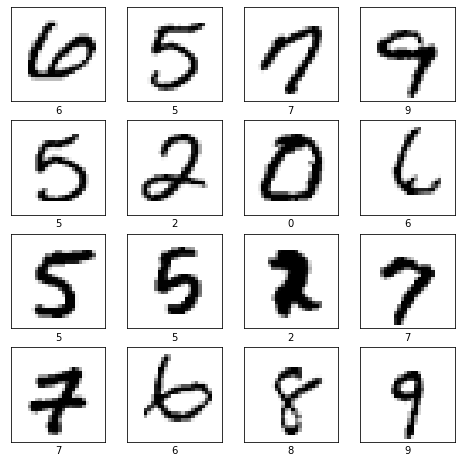

In [15]:
plt.figure(figsize=(8,8))
for i in range(4*4):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Dataset

In [0]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [0]:
image_label_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))

In [0]:
image_count = len(y_train)

In [19]:
ds = image_label_ds.cache(filename='./cache.tf-data')
ds = ds.apply(
    tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))

Instructions for updating:
Use `tf.data.Dataset.shuffle(buffer_size, seed)` followed by `tf.data.Dataset.repeat(count)`. Static tf.data optimizations will take care of using the fused implementation.


In [0]:
BATCH_SIZE = 32
ds = ds.batch(BATCH_SIZE).prefetch(1)

In [0]:
ds_valid = tf.data.Dataset.from_tensor_slices((x_test, y_test))
ds_valid = ds_valid.batch(BATCH_SIZE).prefetch(buffer_size=AUTOTUNE)

## Model

In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Train

In [25]:
history = model.fit(ds, epochs=10, steps_per_epoch=625, workers=0, validation_data=ds_valid)

Train for 625 steps, validate for 313 steps
Epoch 1/10
625/625 [==============================] - 5s 7ms/step - loss: 0.4562 - accuracy: 0.8678 - val_loss: 0.2362 - val_accuracy: 0.9323
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2297 - accuracy: 0.9324 - val_loss: 0.1727 - val_accuracy: 0.9490
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1704 - accuracy: 0.9505 - val_loss: 0.1531 - val_accuracy: 0.9532
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1331 - accuracy: 0.9604 - val_loss: 0.1282 - val_accuracy: 0.9605
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1140 - accuracy: 0.9668 - val_loss: 0.1186 - val_accuracy: 0.9646
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0937 - accuracy: 0.9721 - val_loss: 0.1101 - val_accuracy: 0.9659
Epoch 7/10
625/625 [==============================] - 2s 4ms/step - loss: 0.0785 - accuracy: 0.9762 - va

In [26]:
history.history

{'accuracy': [0.8678,
  0.9324,
  0.95045,
  0.9604,
  0.96685,
  0.9721,
  0.97625,
  0.9798,
  0.98095,
  0.98315],
 'loss': [0.45617430665493014,
  0.2297257640838623,
  0.17040661891698838,
  0.13314371969401836,
  0.11401742925122381,
  0.09370460579171777,
  0.07850179155133664,
  0.06782914817444981,
  0.060600321112573144,
  0.05554643325135112],
 'val_accuracy': [0.9323,
  0.949,
  0.9532,
  0.9605,
  0.9646,
  0.9659,
  0.9661,
  0.9675,
  0.9687,
  0.9682],
 'val_loss': [0.23618346911233168,
  0.1727298160854239,
  0.1530799861497487,
  0.1282429235668246,
  0.11863359978021577,
  0.1101149165212138,
  0.11267985178536316,
  0.10712959101299395,
  0.10464759934621978,
  0.10624135379087568]}

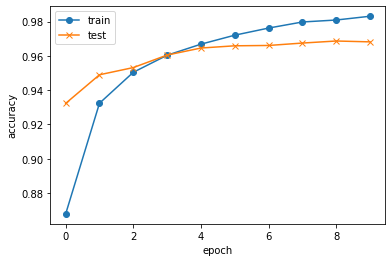

In [27]:
#acc, val_accのプロット
plt.plot(history.history["accuracy"], label="train", ls="-", marker="o")
plt.plot(history.history["val_accuracy"], label="test", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

## Test

In [28]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 1s 69us/sample - loss: 0.1064 - accuracy: 0.9682


In [0]:
preds = model.predict(x_test)

In [30]:
preds.shape

(10000, 10)

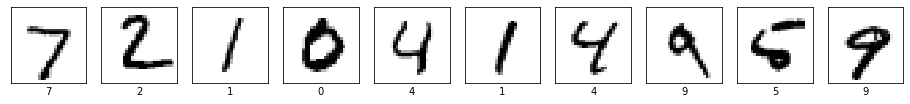

[7 2 1 0 4 1 4 9 6 9]


In [31]:
plt.figure(figsize=(16,16))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(y_test[i])
plt.show()
print(np.argmax(model.predict(x_test[0:10]), axis=1))

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

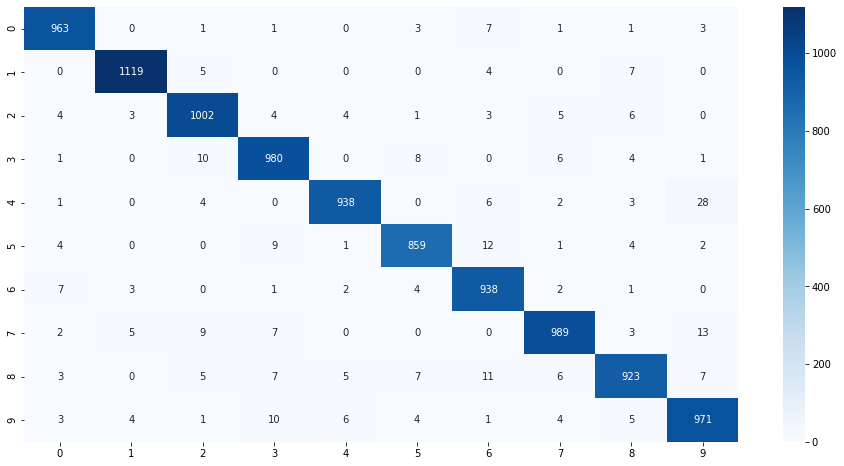

In [33]:
cm = confusion_matrix(y_test,np.argmax(preds,axis=1))
plt.figure(figsize=(16,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()